In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
np.random.seed(42)
n_samples = 150

In [3]:
study_hours = np.random.uniform(1, 10, n_samples)
sleep_hours = np.random.uniform(4, 10, n_samples)

In [4]:
exam_score = 5 * study_hours + 2 * sleep_hours + np.random.normal(0, 5, n_samples)

In [5]:
df = pd.DataFrame({
    'study_hours': study_hours,
    'sleep_hours': sleep_hours,
    'exam_score': exam_score
})

print("Dataset created!")
print(df.head())
print(f"\nShape: {df.shape}")

Dataset created!
   study_hours  sleep_hours  exam_score
0     4.370861     9.449595   40.981355
1     9.556429     5.437371   55.398885
2     7.587945     4.869369   58.398186
3     6.387926     6.936717   48.982660
4     2.404168     9.913903   21.722931

Shape: (150, 3)


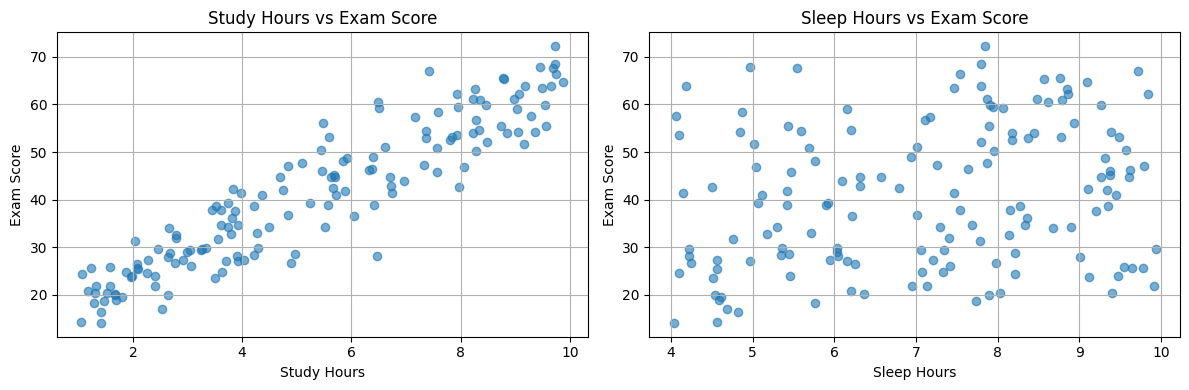

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['study_hours'], df['exam_score'], alpha=0.6)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['sleep_hours'], df['exam_score'], alpha=0.6)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours vs Exam Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
X = df[['study_hours', 'sleep_hours']]
y = df['exam_score']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
print(f"\nModel Equation:")
print(f"Exam Score = {model.intercept_:.2f} + {model.coef_[0]:.2f}*study_hours + {model.coef_[1]:.2f}*sleep_hours")



Model Equation:
Exam Score = 1.38 + 5.28*study_hours + 1.67*sleep_hours


In [11]:
y_pred = model.predict(X_test)

In [12]:
print(f"\nR² Score: {r2_score(y_test, y_pred):.4f}")


R² Score: 0.8783


In [13]:
print("\nSample Predictions:")
for i in range(5):
    print(f"  Student {i+1}: Actual={y_test.iloc[i]:.1f}, Predicted={y_pred[i]:.1f}")


Sample Predictions:
  Student 1: Actual=54.7, Predicted=55.8
  Student 2: Actual=26.6, Predicted=34.3
  Student 3: Actual=59.0, Predicted=59.4
  Student 4: Actual=38.7, Predicted=39.4
  Student 5: Actual=62.1, Predicted=59.8


In [26]:
import plotly.express as px
import plotly.graph_objects as go

In [14]:
np.random.seed(123)
n = 80

In [15]:
temperature = np.random.uniform(15, 35, n)
humidity = np.random.uniform(30, 90, n)
wind_speed = np.random.uniform(0, 20, n)

In [16]:
ice_cream_sales = (3*temperature + 0.2*humidity - 1.5*wind_speed +
                   50 + np.random.normal(0, 10, n))

In [21]:
df = pd.DataFrame({
    'temperature': temperature,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'sales': ice_cream_sales
})

print("Ice Cream Sales Dataset Created!")
print(df.head())

Ice Cream Sales Dataset Created!
   temperature   humidity  wind_speed       sales
0    28.929384  49.125986    8.764288  133.403844
1    20.722787  71.518218   15.301922  101.452498
2    19.537029  63.262995   11.312840  103.429203
3    26.026295  53.337034    1.698083  127.046097
4    29.389379  85.507949   11.653422  136.837570


In [22]:
X = df[['temperature', 'humidity']]
y = df['sales']
model = LinearRegression()
model.fit(X, y)
print(f"\nModel Equation (using temp & humidity only):")
print(f"Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f}*temperature + {model.coef_[1]:.2f}*humidity")


Model Equation (using temp & humidity only):
Sales = 37.54 + 3.06*temperature + 0.11*humidity


In [27]:
fig = px.scatter_3d(df, x='temperature', y='humidity', z='sales',
                     title='3D Scatter Plot: Temperature vs Humidity vs Ice Cream Sales',
                     labels={'temperature': 'Temperature (°C)',
                             'humidity': 'Humidity (%)',
                             'sales': 'Ice Cream Sales'})


In [28]:
x_range = np.linspace(df['temperature'].min(), df['temperature'].max(), 10)
y_range = np.linspace(df['humidity'].min(), df['humidity'].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)


In [29]:
z_grid = model.intercept_ + model.coef_[0] * x_grid + model.coef_[1] * y_grid


In [32]:
fig.add_trace(go.Surface(x=x_range, y=y_range, z=z_grid,
                         colorscale='Hot', opacity=0.5,
                         name='Regression Plane'))

In [33]:
fig.show()

In [34]:
fig2 = px.scatter_3d(df, x='temperature', y='humidity', z='sales',
                      title='3D Scatter Plot Only',
                      labels={'temperature': 'Temperature (°C)',
                              'humidity': 'Humidity (%)',
                              'sales': 'Ice Cream Sales'})
fig2.show()